In [1]:
using LinearAlgebra, BenchmarkTools, Profile, GLMakie
using Statistics, Distributions
using LaTeXStrings
GLMakie.activate!(inline=true)
# set_theme!(theme_black())
# plotlyjs()

In [2]:
include("./FPsim.jl")
using .FPsim

#### 1D OU-process

In [96]:
sim_t = 500
sim_ensemble_n = 100000

coff = LangevinCoff(t->Diagonal([2.0]), t->(-0.5t))
ens = init_LangevinEnsemble(1, sim_t, 0.01, coff, :Delta, sim_ensemble_n)

LangevinEnsemble(1, 500, 0.01, 100000, [0.0 0.08757822708271219 … -1.6284299364418728 -1.6111421551275826;;; 0.0 -0.11788777291593362 … 0.5040961864271727 -0.09579291747173913;;; 0.0 0.03291755120166442 … 5.319543555834719 4.945444616328918;;; … ;;; 0.0 0.26018520070617024 … 1.4465462459752056 1.6761541480799547;;; 0.0 0.0027108908236449245 … -1.076768738810584 -1.2538614004682114;;; 0.0 0.1129136857076135 … -0.11295043311094201 -0.12038142718277468])

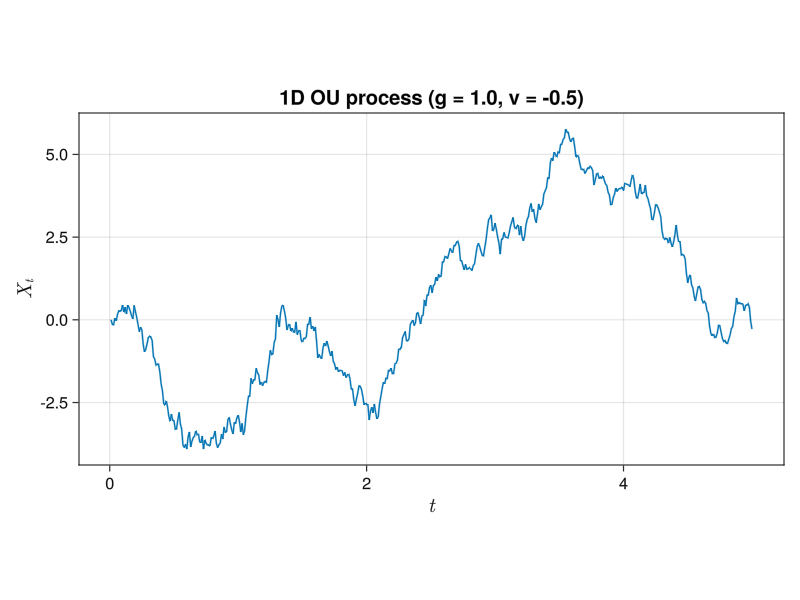

In [36]:
f = Figure(size = (500, 1000))
ax1 = Axis(f[1, 1], aspect = 2, title = "1D OU process (g = 1.0, v = -0.5)",
            xlabel = L"t", ylabel = L"X_t", xlabelsize = 20, ylabelsize = 20,
            titlesize = 20)

lines!(ax1, (1:sim_t).*ens.Δt, ens.paths[1, :, 1])

save("./res/OU1.png", f)

f

In [49]:
time = Observable(100)

ens_paths_x = @lift(ens.paths[1, $time, :])
title = @lift("t = " * string(round($time*ens.Δt, digits = 2)))


fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = title, xlabel = L"x", ylabel = L"P(x)")

hist!(ax1, ens_paths_x, bins = -7.0:0.01:7.0, normalization = :pdf)

framerate = 10
timestamps = 1:500

record(fig, "./res/OU-hist.mp4", timestamps; framerate = framerate) do t
    time[] = t
end

"./res/OU-hist.mp4"

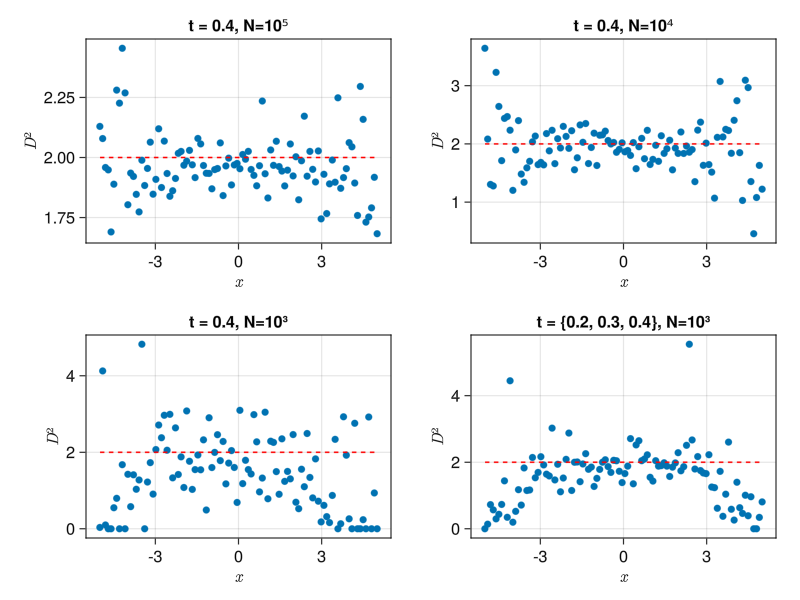

In [131]:
fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D¹")
ax2 = Axis(fig[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D¹")
ax3 = Axis(fig[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D¹")
ax4 = Axis(fig[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D¹")

fig_alt =  Figure(size = [1000, 1000])
ax_alt1 = Axis(fig_alt[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D²")
ax_alt2 = Axis(fig_alt[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D²")
ax_alt3 = Axis(fig_alt[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D²")
ax_alt4 = Axis(fig_alt[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D²")



g = Grid(1, [-5.0], 0.1, 100)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax1, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax1, LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
scatter!(ax_alt1, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt1, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax2, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax2, LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
scatter!(ax_alt2, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt2, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax3, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax3, LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
scatter!(ax_alt3, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt3, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 200:100:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax4, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax4, LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
scatter!(ax_alt4, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt4, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


save("./res/OU-ReD1.png", fig)
save("./res/OU-ReD2.png", fig_alt)


fig_alt

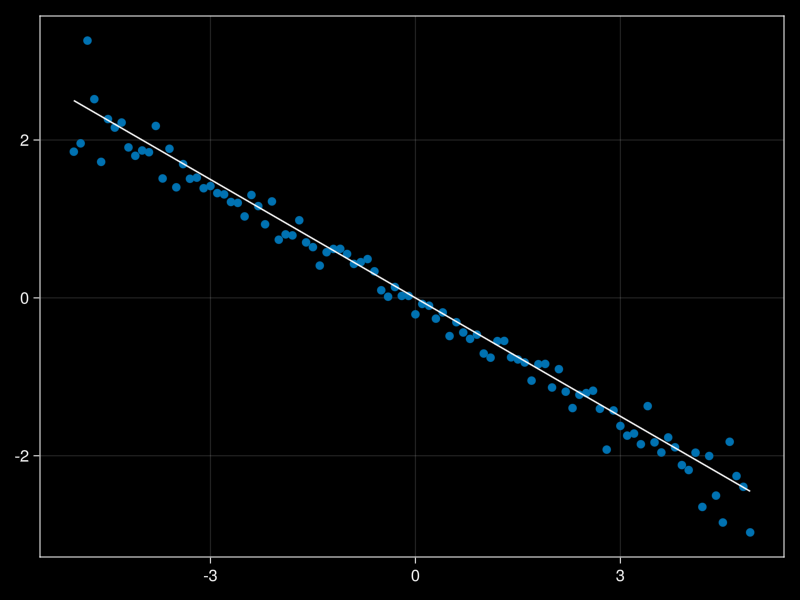

In [7]:
f, ax = GLMakie.scatter(-5:0.1:4.9, estimated_D1)
lines!(-5:0.1:4.9, x->-0.5*x, color = :White)

f

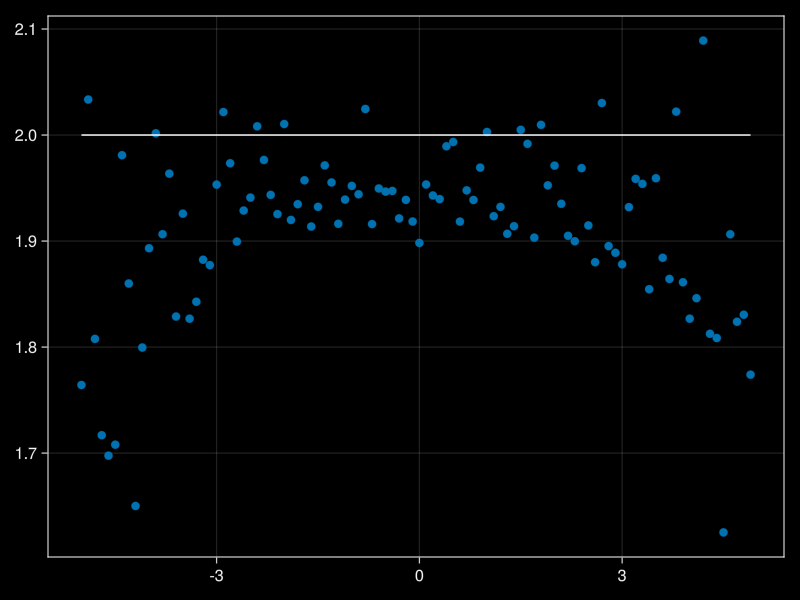

In [9]:
f, ax = GLMakie.scatter(-5:0.1:4.9, estimated_D2)
lines!(-5:0.1:4.9, x->2.0, color = :White)

f

#### 1D Double well

In [132]:
sim_t = 500
sim_ensemble_n = 100000

init_dist = () -> rand(Uniform(-1, 1), 1)
coff = LangevinCoff(t->Diagonal([2.0]), t->4*t-0.72(t't)*t)
ens = init_LangevinEnsemble(1, sim_t, 0.01, coff, init_dist, sim_ensemble_n)

LangevinEnsemble(1, 500, 0.01, 100000, [-0.15866822175796247 -0.3589767532867869 … 3.1297788499396875 2.860345938138592;;; 0.45698199774352743 0.6400751990990635 … -2.060480008045255 -2.179441789347697;;; 0.5850518755294947 0.4552957740837069 … 2.400577676509102 2.638345570802409;;; … ;;; 0.6562372578172118 0.8133847783720775 … 2.849014706179375 2.675281459583906;;; -0.4436888360717439 -0.6437936924961716 … -1.9913648532345298 -1.9124397135007125;;; -0.7262744149770168 -0.8016467515986538 … 3.140201361868729 3.0023403402717017])

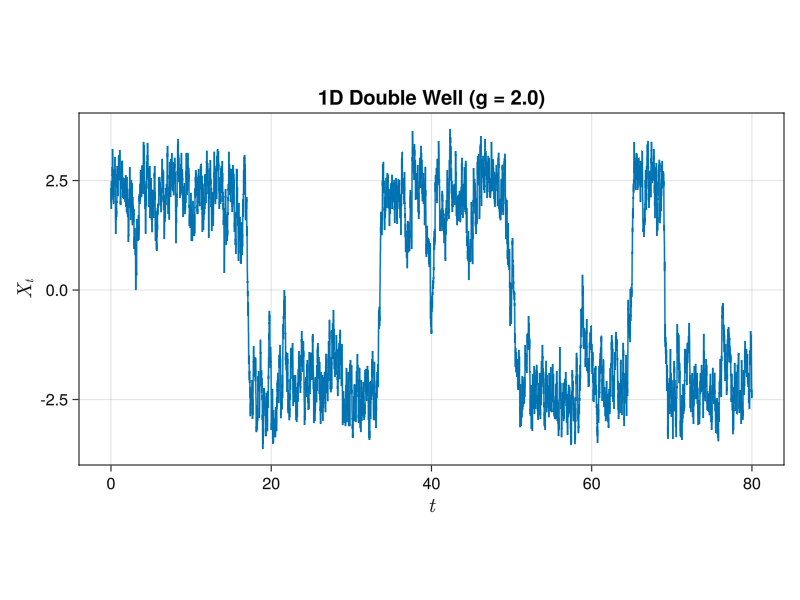

In [33]:
long_path = init_LangevinPath(1, 8000, 0.01, coff, [2.0])

f = Figure(size = (500, 1000))
ax1 = Axis(f[1, 1], aspect = 2, title = "1D Double Well (g = 2.0)",
            xlabel = L"t", ylabel = L"X_t", xlabelsize = 20, ylabelsize = 20,
            titlesize = 20)

lines!(ax1, (1:8000).*long_path.Δt, long_path.path[1, :])

save("./res/MH1.png", f)
f

In [55]:
time = Observable(200)

ens_paths_x = @lift(ens.paths[1, $time, :])
title = @lift("t = " * string(round($time*ens.Δt, digits = 2)))


fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = title, xlabel = L"x", ylabel = L"P(x)")

pot(t) = (-2*t^2 + 0.18*t^4 + 6) / 50
lines!(ax1, -7.0:0.01:7.0, pot, label = "Potential (scaled)", linestyle = :dash,
        color = :Red)
ylims!(ax1, 0, 0.4)
axislegend(ax1)

hist!(ax1, ens_paths_x, bins = -7.0:0.01:7.0, normalization = :pdf)

framerate = 10
timestamps = 1:500

record(fig, "./res/MH-hist.mp4", timestamps; framerate = framerate) do t
    time[] = t
end

"./res/MH-hist.mp4"

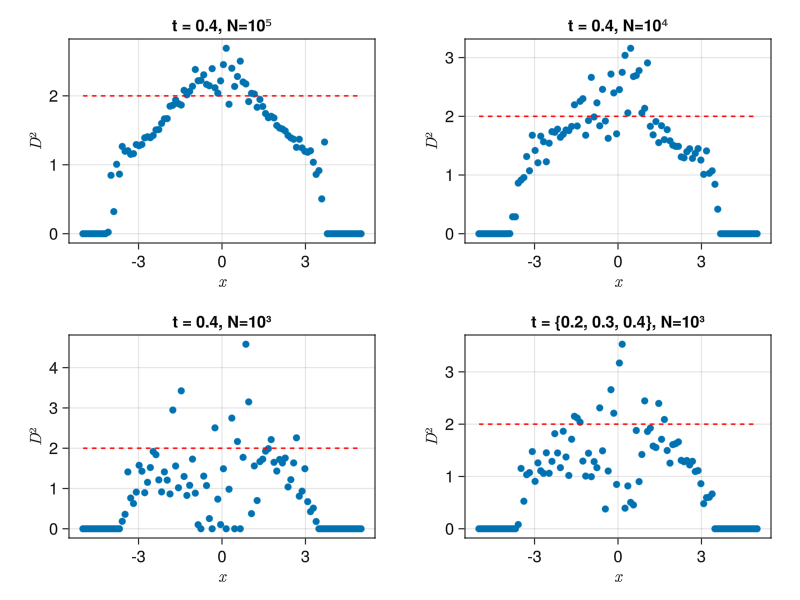

In [139]:
fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D¹")
ax2 = Axis(fig[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D¹")
ax3 = Axis(fig[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D¹")
ax4 = Axis(fig[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D¹")

fig_alt =  Figure(size = [1000, 1000])
ax_alt1 = Axis(fig_alt[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D²")
ax_alt2 = Axis(fig_alt[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D²")
ax_alt3 = Axis(fig_alt[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D²")
ax_alt4 = Axis(fig_alt[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D²")

ylims!.([ax1, ax2, ax3, ax4], -15, 15)


g = Grid(1, [-5.0], 0.1, 100)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax1, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax1, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt1, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt1, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax2, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax2, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt2, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt2, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax3, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax3, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt3, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt3, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 200:100:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax4, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax4, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt4, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt4, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


save("./res/MH-ReD1.png", fig)
save("./res/MH-ReD2.png", fig_alt)


fig_alt

#### 1D Anderson - Kubo

In [140]:
sim_t = 500
sim_ensemble_n = 100000

init_dist = () -> rand(Uniform(-3, 3), 1)
coff = LangevinCoff(t->Diagonal([t[1]]), t->(0.0)*t)
ens = init_LangevinEnsemble(1, sim_t, 0.01, coff, init_dist, sim_ensemble_n)

LangevinEnsemble(1, 500, 0.01, 100000, [0.28603262727301626 0.2982124882731806 … 0.09597180668099818 0.08303048533068551;;; 2.427276169369293 2.20899317257536 … 0.012556304736695594 0.013726692621629486;;; -1.9009626146185452 -1.6892223424194306 … -0.20689853032229863 -0.2003016734755157;;; … ;;; 2.287338890812613 2.5334373442672535 … 84.3223116019569 83.96170100863058;;; -0.5660605541285912 -0.6037394650140292 … -0.012300568649857416 -0.010975858669462607;;; 2.666832294879155 2.7655492562287844 … 0.08419436738988151 0.07262179451031804])

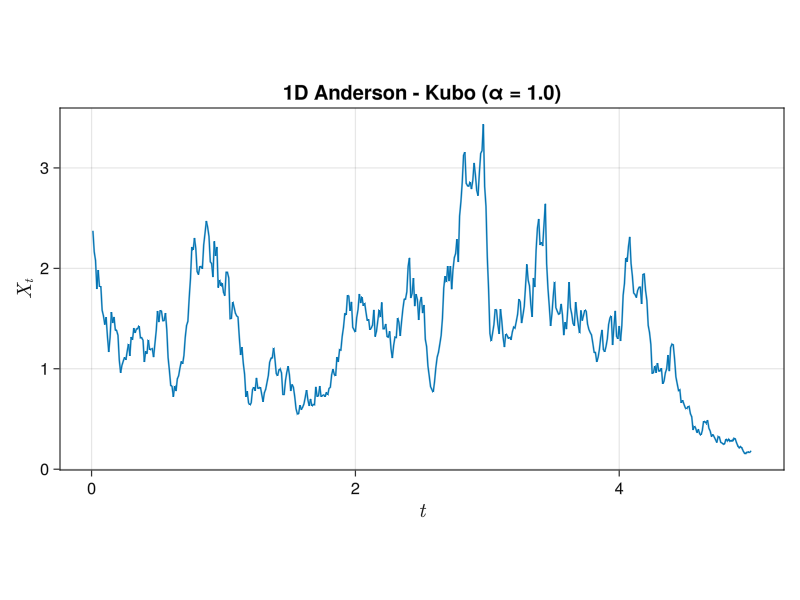

In [80]:
f = Figure(size = (500, 1000))
ax1 = Axis(f[1, 1], aspect = 2, title = "1D Anderson - Kubo (α = 1.0)",
            xlabel = L"t", ylabel = L"X_t", xlabelsize = 20, ylabelsize = 20,
            titlesize = 20)

lines!(ax1, (1:sim_t).*ens.Δt, ens.paths[1, :, 10])

save("./res/AK1.png", f)

f

In [74]:
time = Observable(200)

ens_paths_x = @lift(ens.paths[1, $time, :])
title = @lift("t = " * string(round($time*ens.Δt, digits = 2)))


fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = title, xlabel = L"x", ylabel = L"P(x)")


hist!(ax1, ens_paths_x, bins = -7.0:0.01:7.0, normalization = :pdf)

framerate = 10
timestamps = 1:500

record(fig, "./res/AK-hist.mp4", timestamps; framerate = framerate) do t
    time[] = t
end

"./res/AK-hist.mp4"

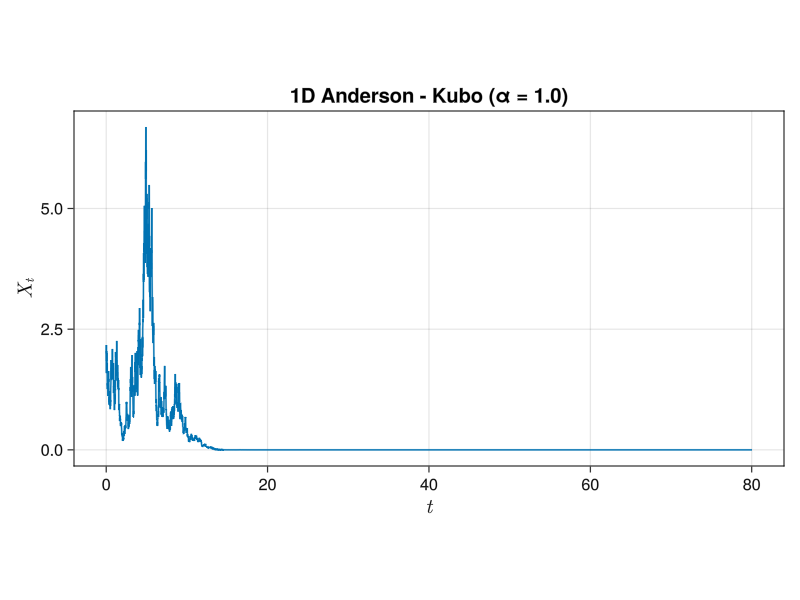

In [69]:
long_path = init_LangevinPath(1, 8000, 0.01, coff, [2.0])

f = Figure(size = (500, 1000))
ax1 = Axis(f[1, 1], aspect = 2, title = "1D Anderson - Kubo (α = 1.0)",
            xlabel = L"t", ylabel = L"X_t", xlabelsize = 20, ylabelsize = 20,
            titlesize = 20)

lines!(ax1, (1:8000).*long_path.Δt, long_path.path[1, :])

save("./res/AK1-long.png", f)

f

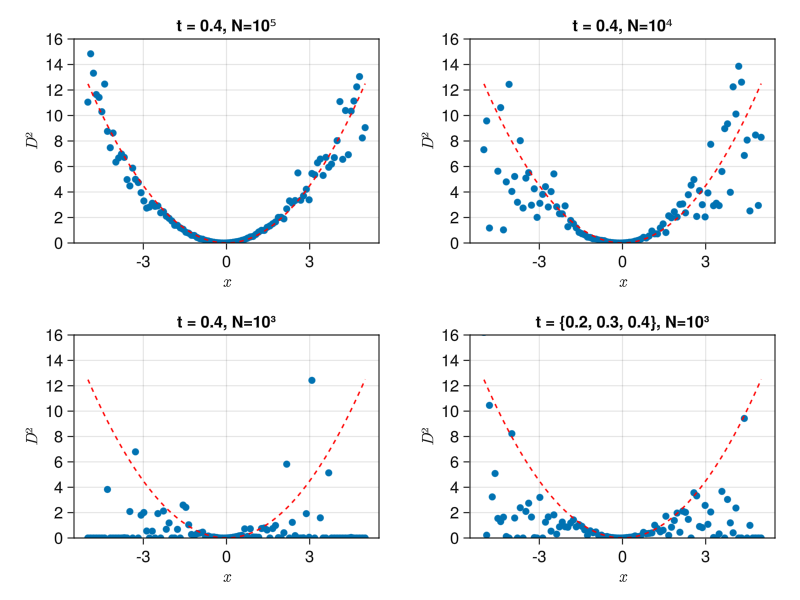

In [143]:
fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D¹")
ax2 = Axis(fig[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D¹")
ax3 = Axis(fig[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D¹")
ax4 = Axis(fig[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D¹")

fig_alt =  Figure(size = [1000, 1000])
ax_alt1 = Axis(fig_alt[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D²")
ax_alt2 = Axis(fig_alt[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D²")
ax_alt3 = Axis(fig_alt[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D²")
ax_alt4 = Axis(fig_alt[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D²")

ylims!.([ax_alt1, ax_alt2, ax_alt3, ax_alt4], 0, 16)


g = Grid(1, [-5.0], 0.1, 100)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax1, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax1, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt1, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt1, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax2, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax2, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt2, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt2, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax3, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax3, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt3, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt3, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 200:100:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax4, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax4, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt4, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt4, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


save("./res/AK-ReD1.png", fig)
save("./res/AK-ReD2.png", fig_alt)


fig_alt

#### 1D Black - Scholes

In [144]:
sim_t = 500
sim_ensemble_n = 100000

init_dist = () -> rand(Uniform(-3, 3), 1)
coff = LangevinCoff(t->Diagonal([t[1]]), t->(0.75)*t)
ens = init_LangevinEnsemble(1, sim_t, 0.01, coff, init_dist, sim_ensemble_n)

LangevinEnsemble(1, 500, 0.01, 100000, [0.4492302305380278 0.43214200701596217 … 0.3940113915046329 0.4126348287795023;;; -2.02985441580293 -1.613164686201947 … -0.14370546120030037 -0.17105101652171495;;; 0.9867349758832828 1.1525670756474222 … 1.4057033159779542 1.4490606604413017;;; … ;;; -1.7860313196615534 -1.5106128979044096 … -3.455453137091939 -2.6934853370779965;;; -1.6071822344849092 -1.6443121032989807 … -1.2405997696862048 -1.221759208466157;;; 2.3315966387946414 2.5231270294739443 … 54.009149472701445 55.11251934111702])

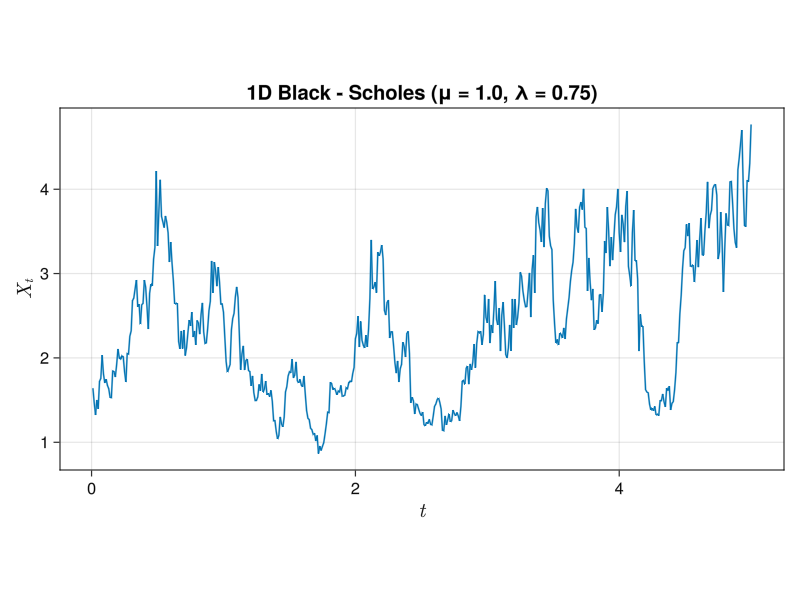

In [90]:
f = Figure(size = (500, 1000))
ax1 = Axis(f[1, 1], aspect = 2, title = "1D Black - Scholes (μ = 1.0, λ = 0.75)",
            xlabel = L"t", ylabel = L"X_t", xlabelsize = 20, ylabelsize = 20,
            titlesize = 20)

lines!(ax1, (1:sim_t).*ens.Δt, ens.paths[1, :, 10])

save("./res/BS1.png", f)

f

In [91]:
time = Observable(200)

ens_paths_x = @lift(ens.paths[1, $time, :])
title = @lift("t = " * string(round($time*ens.Δt, digits = 2)))


fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = title, xlabel = L"x", ylabel = L"P(x)")


hist!(ax1, ens_paths_x, bins = -7.0:0.01:7.0, normalization = :pdf)

framerate = 10
timestamps = 1:500

record(fig, "./res/BS-hist.mp4", timestamps; framerate = framerate) do t
    time[] = t
end

"./res/BS-hist.mp4"

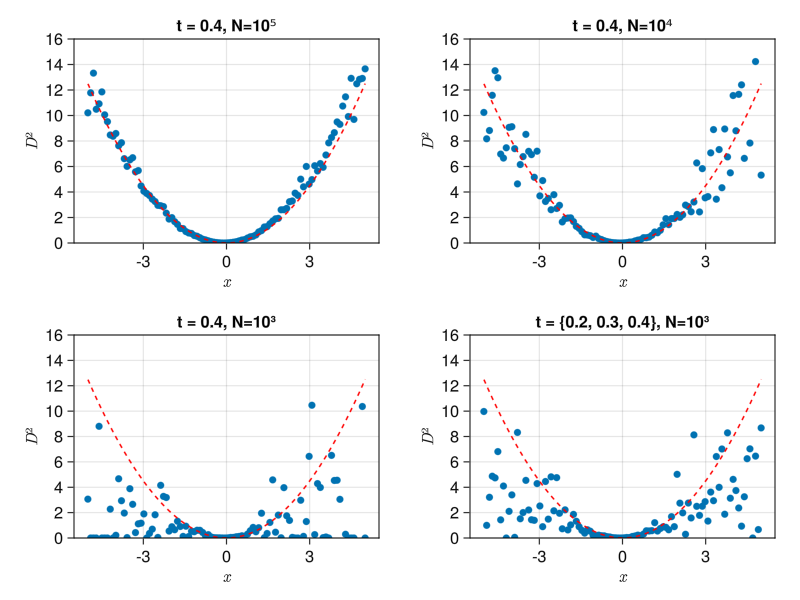

In [145]:
fig =  Figure(size = [1000, 1000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D¹")
ax2 = Axis(fig[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D¹")
ax3 = Axis(fig[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D¹")
ax4 = Axis(fig[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D¹")

fig_alt =  Figure(size = [1000, 1000])
ax_alt1 = Axis(fig_alt[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D²")
ax_alt2 = Axis(fig_alt[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D²")
ax_alt3 = Axis(fig_alt[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D²")
ax_alt4 = Axis(fig_alt[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D²")

ylims!.([ax_alt1, ax_alt2, ax_alt3, ax_alt4], 0, 16)


g = Grid(1, [-5.0], 0.1, 100)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax1, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax1, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt1, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt1, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)

estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax2, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax2, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt2, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt2, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax3, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax3, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt3, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt3, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(1, 100)
estimated_D2 = zeros(1, 1, 100)
sampling_range = 200:100:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

scatter!(ax4, LinRange(-5.0, 5.0, 100), estimated_D1[1, :], markersize = 10)
lines!(ax4, LinRange(-5.0, 5.0, 100), t->coff.force(t)[1], color = :Red, linestyle = :dash)
scatter!(ax_alt4, LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
lines!(ax_alt4, LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


save("./res/BS-ReD1.png", fig)
save("./res/BS-ReD2.png", fig_alt)


fig_alt

#### 2D OU

In [3]:
sim_t = 500
sim_ensemble_n = 100000

coff = LangevinCoff(t->Diagonal([2.0, 2.0]), t->(-0.5*t))
ens = init_LangevinEnsemble(2, sim_t, 0.01, coff, :Delta, sim_ensemble_n)
;

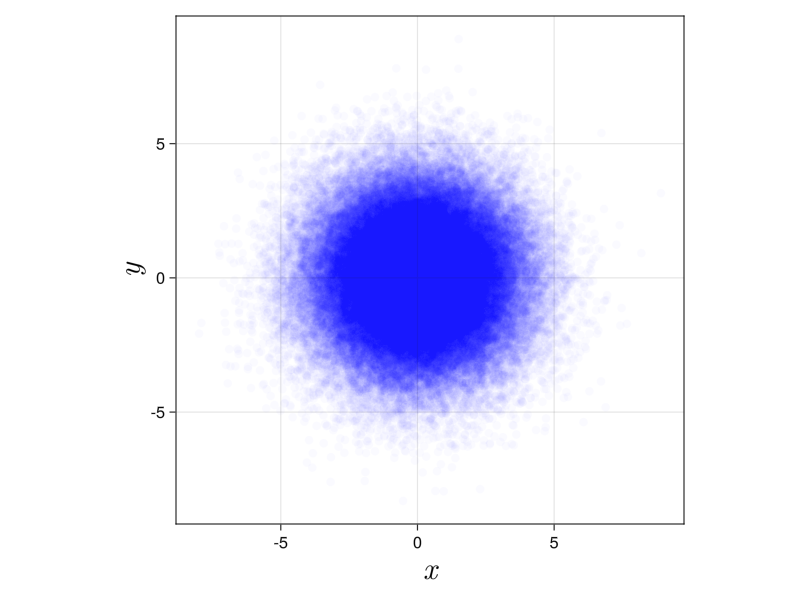

In [11]:
f = Figure(size = (1000, 1000))
ax = Axis(f[1, 1], aspect = 1, xlabel = L"x", ylabel = L"y", xlabelsize = 30, ylabelsize = 30)

GLMakie.scatter!(ax, ens.paths[1, 200, :], ens.paths[2, 200, :], color = (:Blue, 0.02))

f

In [16]:
time = Observable(1)

ani_paths_x = @lift(ens.paths[1, $time, :])
ani_paths_y = @lift(ens.paths[2, $time, :])


fig = Figure(size = (1000, 1000))
ax1 = Axis(fig[1, 1], aspect = 1, xlabel = L"x", ylabel = L"y", xlabelsize = 30, ylabelsize = 30
            , title = "2D OU Process")


scatter!(ax1, ani_paths_x, ani_paths_y, color = (:Blue, 0.2))
xlims!(ax1, [-7, 7])
ylims!(ax1, [-7, 7])

framerate = 30
timestamps = 1:sim_t

record(fig, "./res/OU-2D.mp4", timestamps; framerate = framerate) do t
    time[] = t
end

"./res/OU-2D.mp4"

In [27]:
g = Grid(2, [-5.0, -5.0], 0.1, 100)
estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)

sampling_range = 200:20:400

for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

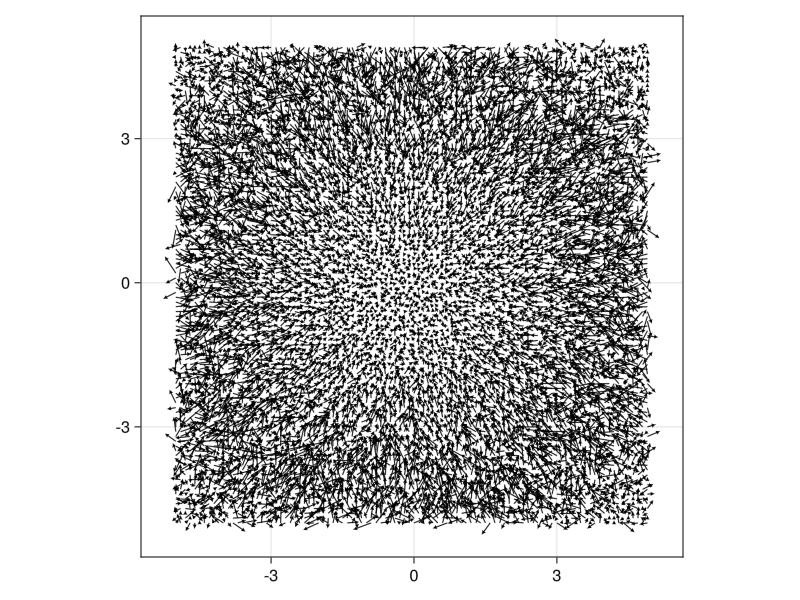

In [32]:
f = Figure(size = (1000, 1000))
ax = Axis(f[1, 1], aspect = 1)


arrows!(ax, -5.0:0.1:4.9, -5.0:0.1:4.9, estimated_D1[1, :, :],  estimated_D1[2, :, :],
        arrowsize = 5.0, lengthscale = 0.08)

f

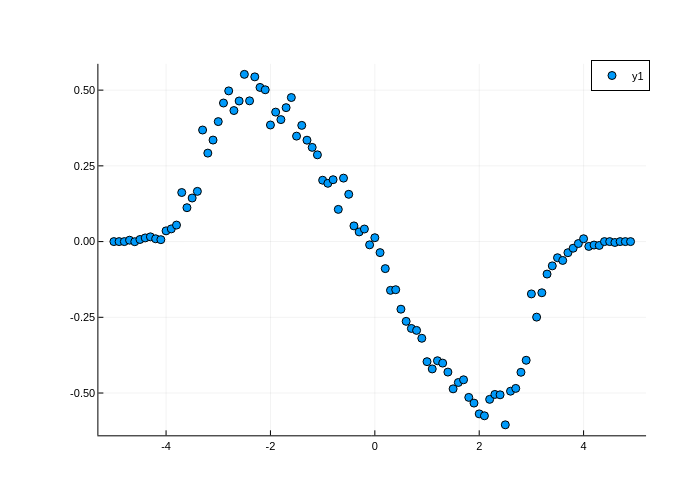

In [188]:
Plots.scatter(-5.0:0.1:4.9, mean.(eachslice(estimated_D1[2, :, :], dims = 2)))
# scatter(estimated_D1[1, :, 49])

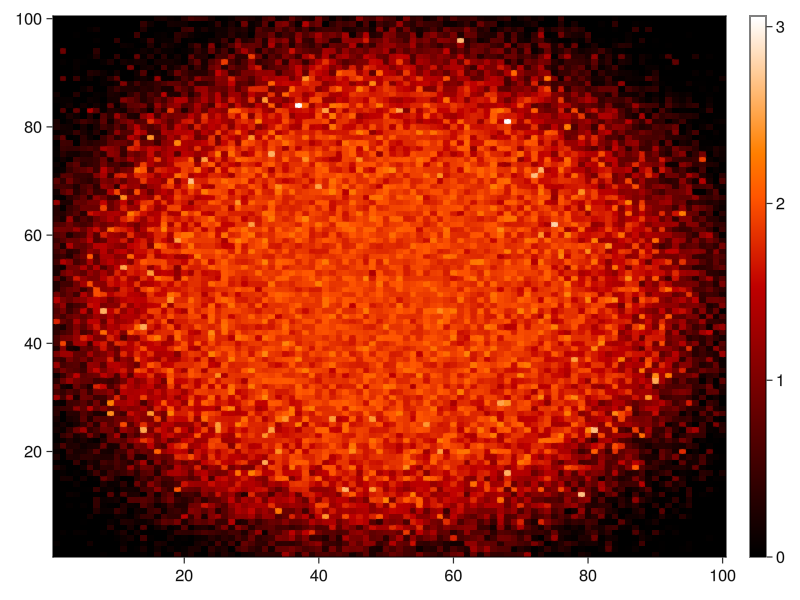

In [33]:
f = Figure(size = (1000, 1000))


ax, hm = heatmap(f[1,1], estimated_D2[1, 1, :, :], colormap = :gist_heat)
Colorbar(f[1, 2], hm)

f

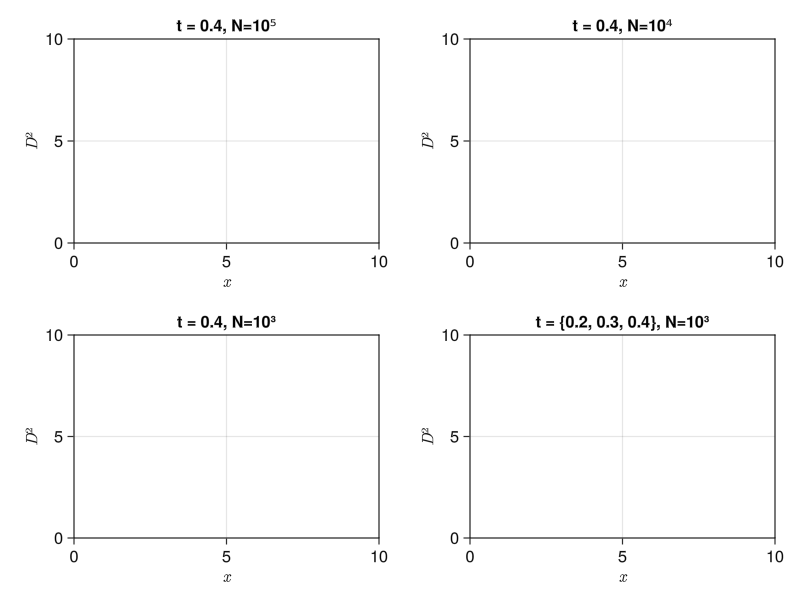

In [24]:
fig =  Figure(size = [4000, 4000])
ax1 = Axis(fig[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D¹")
ax2 = Axis(fig[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D¹")
ax3 = Axis(fig[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D¹")
ax4 = Axis(fig[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D¹")

fig_alt =  Figure(size = [1000, 1000])
ax_alt1 = Axis(fig_alt[1, 1], aspect = 1.5, title = "t = 0.4, N=10⁵", xlabel = L"x", ylabel = L"D²")
ax_alt2 = Axis(fig_alt[1, 2], aspect = 1.5, title = "t = 0.4, N=10⁴", xlabel = L"x", ylabel = L"D²")
ax_alt3 = Axis(fig_alt[2, 1], aspect = 1.5, title = "t = 0.4, N=10³", xlabel = L"x", ylabel = L"D²")
ax_alt4 = Axis(fig_alt[2, 2], aspect = 1.5, title = "t = {0.2, 0.3, 0.4}, N=10³", xlabel = L"x", ylabel = L"D²")



g = Grid(2, [-5.0, -5.0], 0.1, 100)

estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 100000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

arrows!(ax1, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D1[1, :, :], estimated_D1[2, :, :],
        lengthscale = 0.01, arrowsize = 1)
# lines!(ax1, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
# heatmap!(ax_alt1, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
# lines!(ax_alt1, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)

estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

arrows!(ax2, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D1[1, :, :], estimated_D1[2, :, :],
        lengthscale = 0.01, arrowsize = 1)
# lines!(ax2, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
# heatmap!(ax_alt2, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
# lines!(ax_alt2, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)
sampling_range = 400:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

arrows!(ax3, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D1[1, :, :], estimated_D1[2, :, :],
        lengthscale = 0.01, arrowsize = 1)
# lines!(ax3, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
# heatmap!(ax_alt3, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
# lines!(ax_alt3, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)
sampling_range = 200:100:400
for t in sampling_range
    smp = sample_ensemble(ens, 1, 1000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 5)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

arrows!(ax4, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D1[1, :, :], estimated_D1[2, :, :],
        lengthscale = 0.01, arrowsize = 1)
# lines!(ax4, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->-0.5*t, color = :Red, linestyle = :dash)
# heatmap!(ax_alt4, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), estimated_D2[1, 1, :], markersize = 10)
# lines!(ax_alt4, LinRange(-5.0, 5.0, 100), LinRange(-5.0, 5.0, 100), t->(coff.g(t)[1])^2/2, color = :Red, linestyle = :dash)


save("./res/OU-2-ReD1.png", fig)
save("./res/OU-2-ReD2.png", fig_alt)


fig_alt

#### 2D Mexican Hat

In [142]:
sim_t = 500
sim_ensemble_n = 100000

coff = LangevinCoff(t->Diagonal([1.0, 1.0]), t->2*t-0.36(t't)*t)
ens = init_LangevinEnsemble(2, sim_t, 0.01, coff, :Delta, sim_ensemble_n)
;

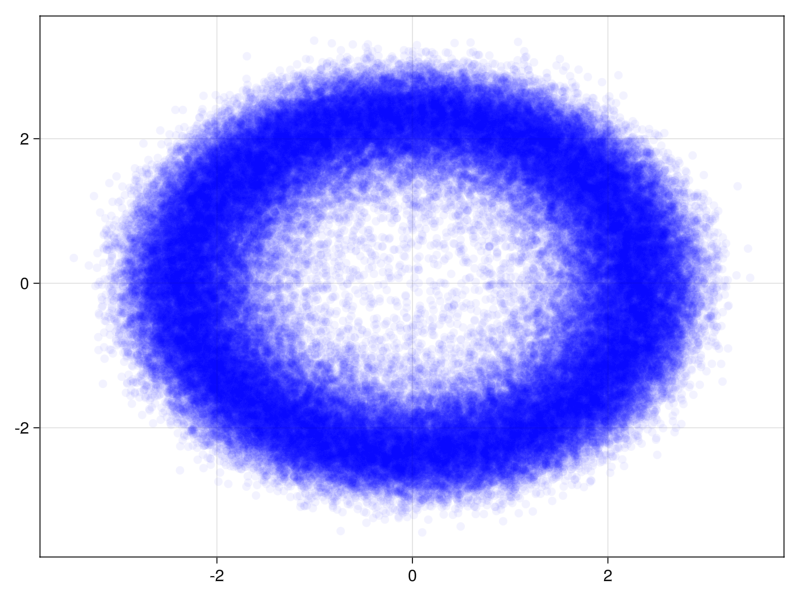

In [143]:
scatter(ens.paths[1, 200, :], ens.paths[2, 200, :], color = (:Blue, 0.05))

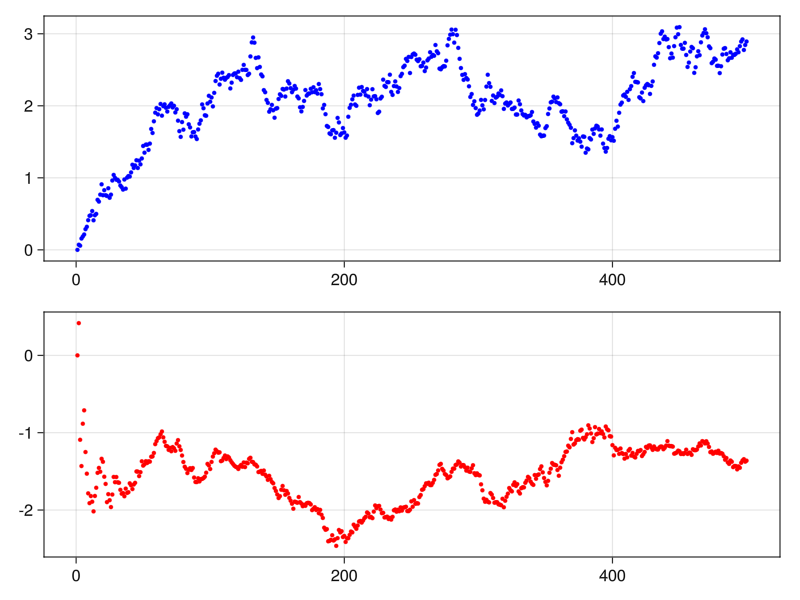

In [147]:
f = Figure(size = (1000, 1000))
ax1 = Axis(f[1, 1], aspect = 3)
ax2 = Axis(f[2, 1], aspect = 3)

r_path = sqrt.(ens.paths[1, :, 5].^2 + ens.paths[2, :, 5].^2)
theta_path = atan.(ens.paths[2, :, 5], ens.paths[1, :, 5])

scatter!(ax1, 1:sim_t, r_path, color = :Blue, markersize = 6.0)
scatter!(ax2, 1:sim_t, theta_path, color = :Red, markersize = 6.0)

f

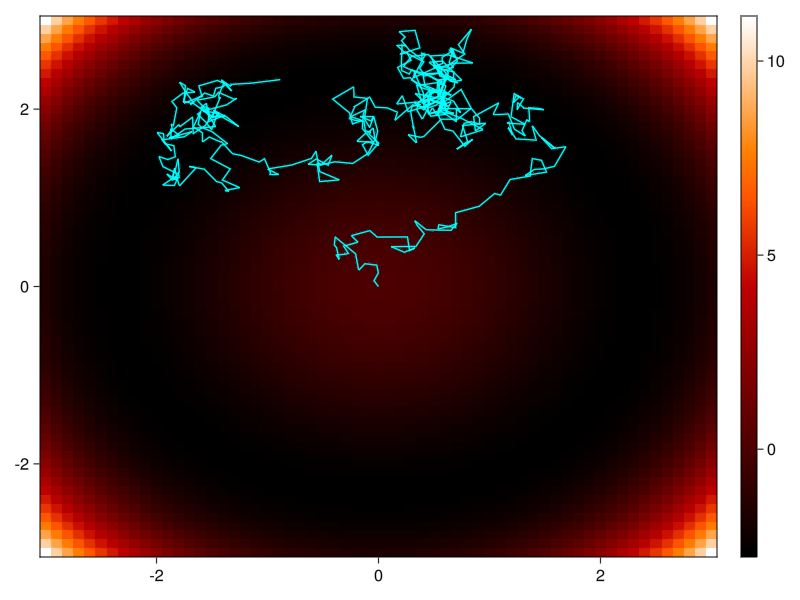

In [14]:
pot3(t) = 0.09*(t't)^2 - (t't)


f, ax, hm = heatmap(-3.0:0.1:3, -3.0:0.1:3, (x,y) -> pot3([x, y]),
                    colormap = :gist_heat)
Colorbar(f[:, end+1], hm)
lines!(ax, ens.paths[1, :, 1], ens.paths[2, :, 1], color = :cyan)
f

In [157]:
g = Grid(2, [-5.0, -5.0], 0.1, 100)
estimated_D1 = zeros(2, 100, 100)
estimated_D2 = zeros(2, 2, 100, 100)

sampling_range = 100:50:400

for t in sampling_range
    smp = sample_ensemble(ens, 1, 10000)
    D1_vec, D2_mat = KM2_estimate(smp, g, t, 20)
    estimated_D1 += D1_vec/ length(sampling_range)
    estimated_D2 += D2_mat/ length(sampling_range)
end

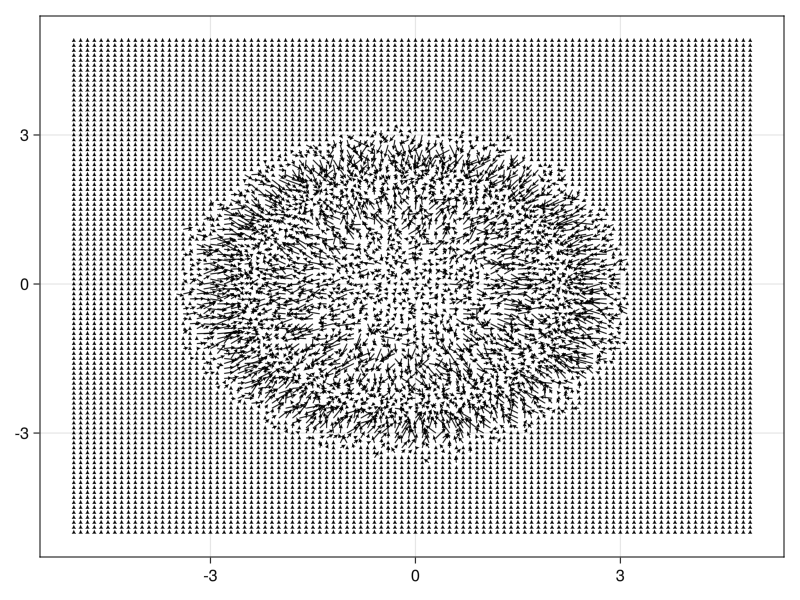

In [159]:
arrows(-5.0:0.1:4.9, -5.0:0.1:4.9, estimated_D1[1, :, :],  estimated_D1[2, :, :],
        arrowsize = 5, lengthscale = 0.1)

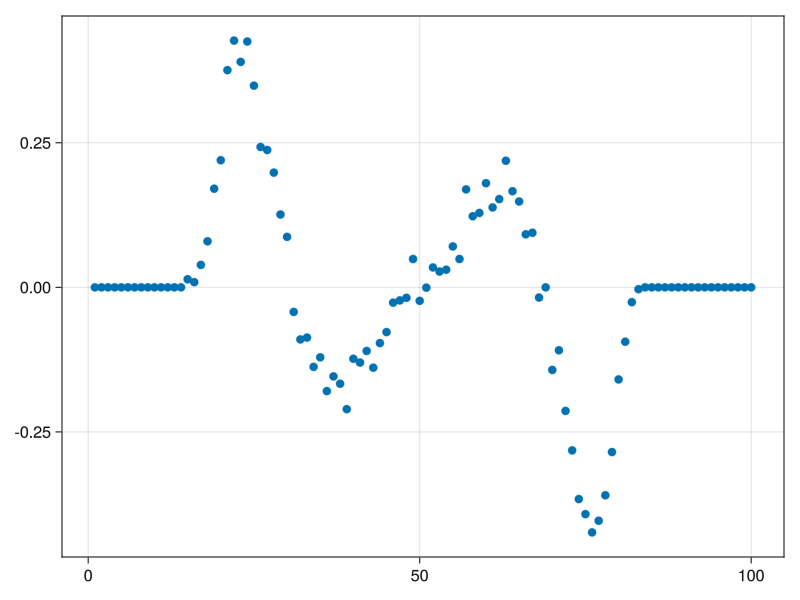

In [158]:
scatter(mean.(eachslice(estimated_D1[2, :, :], dims = 2)))
